# Pure pytorch + torchvision (no tuning of hyperparameters)

## Set kaggle for google doc

In [ ]:
# !mkdir ~/.kaggle
# !touch ~/.kaggle/kaggle.json

# api_token = {"username":"jacopomereu","key":"990b36f186bc214d29950b0269279131"}

# import json

# with open('/root/.kaggle/kaggle.json', 'w') as file:
#     json.dump(api_token, file)

# !chmod 600 ~/.kaggle/kaggle.json

## Downloading and fixing dataset

In [ ]:
# from pathlib import Path

# def download_dataset():
#   dataset_folder_container_path = Path("./data/")

#   # dataset_zip_path = Path("./data/boat-types-recognition.zip")
#   # kaggle_uri = "clorichel/boat-types-recognition"

#   dataset_zip_path = Path("./data/emnist.zip")
#   kaggle_uri = "crawford/emnist"

#   # If the directory is already download, exit
#   if dataset_folder_container_path.exists() and dataset_folder_container_path.is_dir():
#     dataset_has_subfolders = (len(list(dataset_folder_container_path.iterdir()))) > 1
#     if dataset_has_subfolders:
#       return
#   else:
#      dataset_folder_container_path.mkdir()
 
  
#   # If the directory doesn't exist but the zip does, unzip
#   if not dataset_zip_path.is_file():
#     ! kaggle datasets download -d {kaggle_uri} -p {dataset_folder_container_path}
    
#   ! unzip {dataset_zip_path} -d {dataset_folder_container_path}

# def clear_dataset():
#   ! rm -rf ./data

# def remove_unwanted_files():
#   # by class
#   ! rm -rf ./data/emnist-byclass-mapping.txt
#   ! rm -rf ./data/emnist-byclass-test.csv
#   ! rm -rf ./data/emnist-byclass-train.csv
#   # by merge
#   ! rm -rf ./data/emnist-bymerge-mapping.txt
#   ! rm -rf ./data/emnist-bymerge-test.csv
#   ! rm -rf ./data/emnist-bymerge-train.csv
#   # only digits
#   ! rm -rf ./data/emnist-digits-mapping.txt
#   ! rm -rf ./data/emnist-digits-test.csv
#   ! rm -rf ./data/emnist-digits-train.csv
#   # only letters
#   ! rm -rf ./data/emnist-letters-mapping.txt
#   ! rm -rf ./data/emnist-letters-test.csv
#   ! rm -rf ./data/emnist-letters-train.csv
#   # only mnist
#   ! rm -rf ./data/emnist-mnist-mapping.txt
#   ! rm -rf ./data/emnist-mnist-test.csv
#   ! rm -rf ./data/emnist-mnist-train.csv
#   # remove source files...the CSVs already contains the pixel info
#   ! rm -rf ./data/emnist_source_files/
  
# # clear_dataset()
# download_dataset()
# remove_unwanted_files()

In [ ]:
# import re
# import pandas as pd

# def fix_csv(path):
#   # Read as text file
#   with open(f'{path}.csv', 'r', encoding='utf-8') as p:
#       # print(p)
#       lines = p.readlines()
      
#   # Fix the csv
#   lines = [re.sub(r",", ';', line, count=1) for line in lines]
#   lines.insert(0,'id;text\n') # RE-ADD THE HEADER

#   # Write the edited csv
#   with open(f'{path}_filtered.csv', 'w', encoding="utf-8") as p:
#       p.writelines(lines)


# fix_csv(path='./data/emnist-balanced-train')
# fix_csv(path='./data/emnist-balanced-test')

In [ ]:
# path='./data/emnist-balanced-train'

# c=0
# with open(f'{path}_filtered.csv', 'r', encoding='utf-8') as p:
#     print(p.readline())    
#     print(p.readline())    
#     print(p.readline())    

In [ ]:
# df_train = pd.read_csv('./data/emnist-balanced-train_filtered.csv',sep=';')
# df_test = pd.read_csv('./data/emnist-balanced-test_filtered.csv',sep=';')

In [ ]:
# my_transformations = transforms.Compose([
#     transforms.Resize([128,128]),
#     transforms.RandomRotation(degrees=[-30, 30]),
#     transforms.RandomHorizontalFlip(),
#     transforms.RandomGrayscale(),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=(0,0,0),std=(1,1,1)),

# ])

# dataset = torchvision.datasets.ImageFolder('./data/boats/', transform=my_transformations)

# train_size = int(.7 * len(dataset))
# test_size  = len(dataset) - train_size
# train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size]) 

# n_cores = multiprocessing.cpu_count()
# train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=n_cores)
# test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=34, shuffle=True, num_workers=n_cores)

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim 
import torch.nn.functional as F
import torch.backends.cudnn as cudnn

import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

from tqdm import tqdm

import multiprocessing

ModuleNotFoundError: No module named 'torch'

In [ ]:
def load_datasets():
  N_WORKERS = multiprocessing.cpu_count()
  DATASET_TYPE = "balanced"
  BATCH_SIZE = 64
  DO_SHUFFLE = True

  TRANSFORMATIONS_CUSTOM = transforms.Compose([
      # transforms.Resize([128,128]),
      # transforms.RandomRotation(degrees=[-30, 30]),
      # transforms.RandomHorizontalFlip(),
      # transforms.RandomGrayscale(),
      transforms.ToTensor(),
      transforms.Normalize(mean=(0),std=(1)),
  ])


  train_dataset = torchvision.datasets.EMNIST(root="./data2/", split=DATASET_TYPE, train=True, download=True, transform=TRANSFORMATIONS_CUSTOM)
  train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=DO_SHUFFLE, num_workers=N_WORKERS)

  test_dataset = torchvision.datasets.EMNIST(root="./data2/", split=DATASET_TYPE, train=False, download=True, transform=TRANSFORMATIONS_CUSTOM)
  test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=DO_SHUFFLE, num_workers=N_WORKERS)

  return [train_dataset, train_loader, test_dataset, test_loader]


[train_dataset, train_loader, test_dataset, test_loader] = load_datasets()

In [ ]:
import string
def map_labels_to_ascii(c):
  _merged_classes = {"c", "i", "j", "k", "l", "m", "o", "p", "s", "u", "v", "w", "x", "y", "z"}
  _all_classes = set(string.digits + string.ascii_letters)
  current = sorted(list(_all_classes - _merged_classes))
  out = current[c]
  full_out = f"{out}/{out.lower()}" if out.lower() in _merged_classes else out 
  print(f"The letter/digit associated to {c} is {full_out}")
  return out

assert map_labels_to_ascii(0 )=='0'
assert map_labels_to_ascii(1 )=='1'
assert map_labels_to_ascii(2 )=='2'
assert map_labels_to_ascii(3 )=='3'
assert map_labels_to_ascii(4 )=='4'
assert map_labels_to_ascii(5 )=='5'
assert map_labels_to_ascii(6 )=='6'
assert map_labels_to_ascii(7 )=='7'
assert map_labels_to_ascii(8 )=='8'
assert map_labels_to_ascii(9 )=='9'
assert map_labels_to_ascii(10)=='A'
assert map_labels_to_ascii(11)=='B'
assert map_labels_to_ascii(12)=='C' # c
assert map_labels_to_ascii(13)=='D'
assert map_labels_to_ascii(14)=='E'
assert map_labels_to_ascii(15)=='F'
assert map_labels_to_ascii(16)=='G'
assert map_labels_to_ascii(17)=='H'
assert map_labels_to_ascii(18)=='I' # i
assert map_labels_to_ascii(19)=='J' # j
assert map_labels_to_ascii(20)=='K' # k
assert map_labels_to_ascii(21)=='L' # l
assert map_labels_to_ascii(22)=='M' # m
assert map_labels_to_ascii(23)=='N'
assert map_labels_to_ascii(24)=='O' # o
assert map_labels_to_ascii(25)=='P' # p
assert map_labels_to_ascii(26)=='Q'
assert map_labels_to_ascii(27)=='R'
assert map_labels_to_ascii(28)=='S' # s
assert map_labels_to_ascii(29)=='T'
assert map_labels_to_ascii(30)=='U' # u
assert map_labels_to_ascii(31)=='V' # v
assert map_labels_to_ascii(32)=='W' # w
assert map_labels_to_ascii(33)=='X' # x
assert map_labels_to_ascii(34)=='Y' # y
assert map_labels_to_ascii(35)=='Z' # z
assert map_labels_to_ascii(36)=='a'
assert map_labels_to_ascii(37)=='b'
assert map_labels_to_ascii(38)=='d'
assert map_labels_to_ascii(39)=='e'
assert map_labels_to_ascii(40)=='f'
assert map_labels_to_ascii(41)=='g'
assert map_labels_to_ascii(42)=='h'
assert map_labels_to_ascii(43)=='n'
assert map_labels_to_ascii(44)=='q'
assert map_labels_to_ascii(45)=='r'
assert map_labels_to_ascii(46)=='t'

In [ ]:
# print("The dataset contains\n"\
#       + f"\t[{len(dataset.classes)}] classes: {dataset.classes}\n" \
#       + f"\t[{len(dataset)}] images\n")

def show_loader(loader, label):
  def show_grid(grid):
    plt.figure(figsize=(10,10), dpi=100)
    npimg = grid.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.show()

  images, labels = next(iter(loader))
  print(f"The {label} loader contains [{len(loader.dataset)}] images.")
  
  n_classes = len(set(train_loader.dataset.targets.tolist()))
  label_min = train_loader.dataset.targets.min().item()
  label_max = train_loader.dataset.targets.max().item()
  print(f"There are [{n_classes}] classes in the range [{label_min}='{map_labels_to_ascii(label_min)}', {label_max}='{map_labels_to_ascii(label_max)}']")

  show_grid(torchvision.utils.make_grid(images))
  return images, labels

train_images, train_labels = show_loader(train_loader, "train")
# test_images, test_labels = show_loader(test_loader, "test")

## Model

In [ ]:
import math

class MyConvNet(nn.Module):
  def get_size_after_convolution(self, image_size, kernel_size, stride=1, padding=0):
    # O=(floor(n-k+2p)/s)+1 
    new_image_size = math.floor((image_size-kernel_size+2*padding) / stride) + 1
    print(f"CONVOLUTION with W=H={image_size}, K={kernel_size}, S={stride}, P={padding} --> output size Wf=Hf={new_image_size}")
    return new_image_size
  
  def get_size_after_pooling(self, image_size, kernel_size, stride=1, padding=0):
    # O=(floor(n-k)/s)+1 
    new_image_size = math.floor((image_size-kernel_size+2*padding) / stride) + 1
    print(f"POOLING with W=H={image_size}, K={kernel_size}, S={stride} --> output size Wf=Hf={new_image_size}")
    return new_image_size

  def __init__(self, N_CHANNELS, N_CLASSES, IMAGE_SIZE):
    super().__init__()

    MODEL="figo"

    if MODEL == "BURDO":
      # Define the net layers
      self._currentSize = IMAGE_SIZE
      n_chan_in1, n_chan_out1, k1, s1, p1 = N_CHANNELS, 16, 3, 2, 0
      self._currentSize = self.get_size_after_convolution(image_size=self._currentSize, kernel_size=k1, stride=s1, padding=p1)
      n_chan_in2, n_chan_out2, k2, s2, p2 = n_chan_out1, 32, 3, 2, 0
      self._currentSize = self.get_size_after_convolution(image_size=self._currentSize, kernel_size=k2, stride=s2, padding=p2)
      n_chan_in3, n_chan_out3, k3, s3, p3 = n_chan_out2, 64, 3, 2, 0
      self._currentSize = self.get_size_after_convolution(image_size=self._currentSize, kernel_size=k3, stride=s3, padding=p3)

      
      self.convolutional_layers = nn.Sequential(
          nn.Conv2d(n_chan_in1, n_chan_out1, kernel_size=k1, stride=s1, padding=p1),
          nn.ReLU(inplace=True),
          nn.Conv2d(n_chan_in2, n_chan_out2, kernel_size=k2, stride=s2, padding=p2),
          nn.ReLU(inplace=True),
          nn.Conv2d(n_chan_in3, n_chan_out3, kernel_size=k3, stride=s3, padding=p3),
          nn.ReLU(inplace=True)
      )

      self.mlp = nn.Sequential(
          nn.Linear(n_chan_out3*self._currentSize*self._currentSize, 32),
          nn.LeakyReLU(inplace=True),
          nn.Linear(32, N_CLASSES)
      )
    else:
      # Define the net layers
      self._currentSize = IMAGE_SIZE
      n_chan_in1, n_chan_out1, k1, s1, p1 = N_CHANNELS, 16, 3, 2, 0
      self._currentSize = self.get_size_after_convolution(image_size=self._currentSize, kernel_size=k1, stride=s1, padding=p1)
      k2, s2, p2 = 3, 2, 0
      self._currentSize = self.get_size_after_pooling(image_size=self._currentSize, kernel_size=k2, stride=s2, padding=p2)
      n_chan_in3, n_chan_out3, k3, s3, p3 = n_chan_out1, 64, 3, 2, 0
      self._currentSize = self.get_size_after_convolution(image_size=self._currentSize, kernel_size=k3, stride=s3, padding=p3)

      
      self.convolutional_layers = nn.Sequential(
          nn.Conv2d(n_chan_in1, n_chan_out1, kernel_size=k1, stride=s1, padding=p1),
          nn.ReLU(inplace=True),
          nn.MaxPool2d(kernel_size=k2, stride=s2),
          nn.ReLU(inplace=True),
          nn.Conv2d(n_chan_in3, n_chan_out3, kernel_size=k3, stride=s3, padding=p3),
          nn.ReLU(inplace=True)
      )

      self.mlp = nn.Sequential(
          nn.Linear(n_chan_out3*self._currentSize*self._currentSize, 32),
          nn.LeakyReLU(inplace=True),
          nn.Linear(32, N_CLASSES)
      )

  def forward(self, x):
    DO_PRINT_SHAPES = False

    batch_size = x.shape[0]

    # Shape of x before: [batch_size, 3, width, height]
    if DO_PRINT_SHAPES:
      print(f"Shape BEFORE convolutions: {x.shape}")
    x = self.convolutional_layers(x)
    # Shape of x after : [batch_size, 64, 1, 1]
    if DO_PRINT_SHAPES:
      print(f"Shape AFTER convolutions: {x.shape}")
      # f = nn.Flatten()
      # xx = f(x)
      # print(f"What would happen if flatten: {xx.shape}")

    # Change the shape to [3 width*height]
    x =  x.view(batch_size, -1)
    if DO_PRINT_SHAPES:
      print(f"Shape before linear layouts: {x.shape}\n")
    # Apply the last step
    return self.mlp(x)

In [ ]:
batch_size, nChannel, width, height = train_images.shape
assert width == height
nClass = len(set(train_loader.dataset.targets))
learning_rate = .001

In [ ]:
batch_size, nChannel, width, height

In [ ]:
net = MyConvNet(N_CHANNELS=nChannel, N_CLASSES=nClass, IMAGE_SIZE=width).cuda()
net(train_images.cuda())
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=learning_rate)
# optimizer = optim.RAdam(net.parameters(), lr=learning_rate)

## Training

In [ ]:
def training(net, train_loader):

  for epoch in range(5):
    worst_loss, best_loss = 0, 100
    for batch in train_loader:
      # get the inputs
      X,y_real = batch
      X,y_real = X.cuda(), y_real.cuda()


      # forward + backward + optmize
      y_model = net(X)
      loss = criterion(y_model, y_real)
      
      worst_loss = max(worst_loss, loss.item())
      best_loss = min(best_loss, loss.item())
      
      # zero the parameter gradients
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

    # display best statistics of the epoch
    print(f"Epoch:{epoch} \n\t Best-loss =[{best_loss}] \n\t Worst-loss=[{worst_loss}]")

  print("Finished training")
  with open('model_state.pt', 'wb') as f:
    torch.save(net.state_dict(), f)

In [ ]:
training(net, train_loader)

## Testing

In [ ]:
def testing(net, test_loader):
  with open('model_state.pt', 'rb') as f:
    net.load_state_dict(torch.load(f))

  correct = 0
  total = 0
  with torch.no_grad():
    for batch in test_loader:
      X, y_real = batch
      X, y_real = X.cuda(), y_real.cuda()
      net_outputs = net(X) # [batch_size n_classes]
      _, y_predicted = torch.max(net_outputs.data, 1) # Get the tensor with the predicted class labels

      total += y_real.size(0) # n_data is equal to [n_batch] in all batches but the last one, in which is [n_test_image % n_batch]
      correct += (y_predicted == y_real).sum().item()

    print(f"Accuracy of the network on test images: {100*correct/total}")

In [ ]:
testing(net, test_loader)

In [ ]:
test_images, test_labels = show_loader(test_loader, "test")


# Test con keras

In [3]:
import numpy as np

import tensorflow as tf

# ! pip install tensorflow-datasets
import tensorflow_datasets

from tensorflow import keras
from tensorflow.keras import layers

# ! pip install keras-tuner --upgrade
import keras_tuner

c:\Users\Jacopo\miniconda3\envs\tf\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ImportError: cannot import name 'CustomObjectScope' from 'keras.utils.generic_utils' (c:\Users\Jacopo\miniconda3\envs\tf\lib\site-packages\keras\utils\generic_utils.py)

In [4]:
# Load the EMNIST dataset
test_ds, valid_ds, train_ds = tensorflow_datasets.load(name='emnist/balanced', split=["test", "train[0%:29%]", "train[29%:]"], as_supervised=True, shuffle_files=True)

print(f"Length of TRAIN = {len(train_ds)}")
print(f"Length of VALID = {len(valid_ds)}")
print(f"Length of TEST = {len(test_ds)}")

# Normalize the pixel values
def normalize_img(image, label):
    return tf.cast(image, tf.float32) / 255., label

def standardize_img(image, label):
    return (tf.cast(image, tf.float32) - tf.math.reduce_mean(image)) / tf.math.reduce_std(image), label

train_ds = train_ds.map(normalize_img).map(standardize_img)
test_ds = test_ds.map(normalize_img).map(standardize_img)
valid_ds = valid_ds.map(normalize_img).map(standardize_img)

# Set batch size and prefetching
BATCH_SIZE = 32
train_ds = train_ds.batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)
test_ds = test_ds.batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)
valid_ds = valid_ds.batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)

Length of TRAIN = 80088
Length of VALID = 32712
Length of TEST = 18800


In [5]:
import string
def map_labels_to_ascii(c):
  _merged_classes = {"c", "i", "j", "k", "l", "m", "o", "p", "s", "u", "v", "w", "x", "y", "z"}
  _all_classes = set(string.digits + string.ascii_letters)
  current = sorted(list(_all_classes - _merged_classes))
  out = current[c]
  full_out = f"{out}/{out.lower()}" if out.lower() in _merged_classes else out 
  # print(f"The letter/digit associated to {c} is {full_out}")
  return full_out

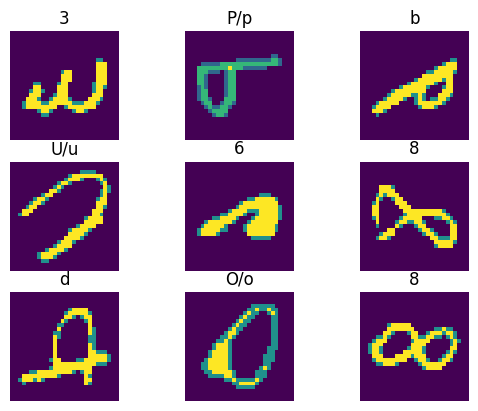

In [6]:
# ! pip install matplotlib
import matplotlib.pyplot as plt

for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(map_labels_to_ascii(int(labels[i])))
        plt.axis("off")

In [7]:
# data_augmentation = keras.Sequential(
#     [
#         layers.RandomFlip("horizontal"),
#         layers.RandomRotation(0.1),
#     ]
# )

In [8]:
# plt.figure(figsize=(10, 10))
# for images, _ in train_ds.take(1):
#     for i in range(9):
#         augmented_images = data_augmentation(images)
#         ax = plt.subplot(3, 3, i + 1)
#         plt.imshow(augmented_images[0].numpy().astype("uint8"))
#         plt.axis("off")

## SENZA TUNING

In [74]:
INPUT_SHAPE, N_CLASSES = (28,28,1),47

def make_model_notuning(lr, k1, nC1, dropout, activation_fun_str, optimizer_str, wd):
  assert activation_fun_str in ["relu", "leaky_relu"]
  assert optimizer_str in ["adam", "adamW"]

  model = keras.Sequential(
      [
          keras.Input(shape=INPUT_SHAPE),
          layers.Conv2D(nC1, kernel_size=(k1, k1), activation=activation_fun_str),
          layers.MaxPooling2D(pool_size=(2, 2)),
          layers.Conv2D(64, kernel_size=(3, 3), activation=activation_fun_str),
          layers.MaxPooling2D(pool_size=(2, 2)),
          layers.Flatten(),
          layers.Dropout(dropout),
          layers.Dense(N_CLASSES, activation="softmax"),
      ]
  )
  
  
  if optimizer_str == "adam":
    my_optimizer = keras.optimizers.Adam(learning_rate=lr, decay=wd) 
  elif optimizer_str == "adamW":
    my_optimizer = keras.optimizers.experimental.AdamW(learning_rate=lr, weight_decay=wd)

  model.compile(
    optimizer=my_optimizer ,
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
  )
  return model

model = make_model_notuning(lr=0.001, k1=3, nC1=32, dropout=0.5, activation_fun_str="relu", optimizer_str="adam", wd=0.1)

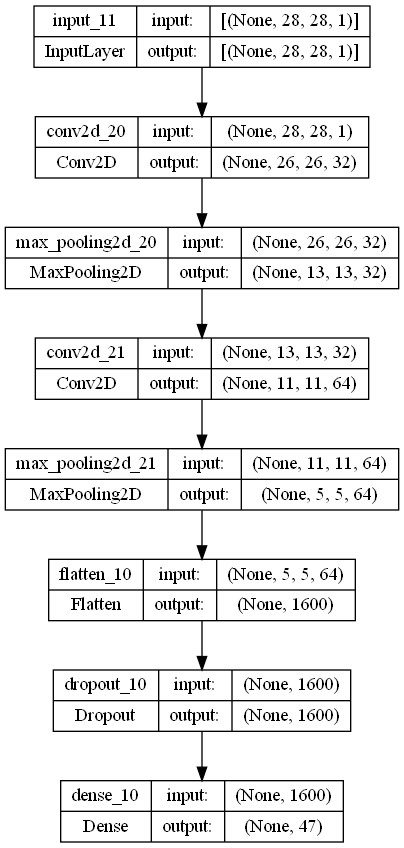

In [75]:
# ! pip install pydot
# ! conda install graphviz
# ! conda install python-graphviz
keras.utils.plot_model(model, show_shapes=True)

In [76]:
TRAIN_LOSS, TRAIN_ACC, VAL_LOSS, VAL_ACC ="loss","accuracy","val_loss","val_accuracy"

callbacks = [
    keras.callbacks.ModelCheckpoint("./checkpoints/no_tuning/save_at_{epoch}.keras"),
    tf.keras.callbacks.EarlyStopping(VAL_LOSS, patience=3, restore_best_weights=True)
]

EPOCHS = 1

model.fit(
    train_ds,
    epochs=EPOCHS,
    callbacks=callbacks,
    validation_data=valid_ds,
)

2503/2503 [==============================] - 12s 5ms/step - loss: 2.4407 - accuracy: 0.3502 - val_loss: 1.8397 - val_accuracy: 0.5695


In [77]:
def print_all_metrics(model, score):
    for i,v in enumerate(model.metrics_names):
        print(f"Test [{v}] = {score[i]}")

In [78]:
# Testing
score = model.evaluate(test_ds)
print_all_metrics(model, score)

588/588 [==============================] - 2s 3ms/step - loss: 1.8463 - accuracy: 0.5679
Test [loss] = 1.8463348150253296
Test [accuracy] = 0.5679255127906799


## CON IL TUNING DEGLI IPERPARAMETRI

In [79]:
def make_model_with_tuning(hp):
  ACTIVATION_FUN_STR = hp.Choice("ACTIVATION_FUN_STR", values=["relu", "leaky_relu"])
  N_CHANNEL1=hp.Int("N_CHANNEL_CONV1", min_value=2, max_value=32, step=2, sampling="log")
  CONV_SIZE1 = hp.Int("CONV_SIZE1", min_value=3, max_value=9)

  DROPOUT=hp.Float("DROPOUT", min_value=0.0, max_value=0.8, step=0.1)

  OPTIMIZER_STR = hp.Choice("OPTIMIZER_STR", values=["adam", "adamW"])
  LR = hp.Float("LR", min_value=1e-4, max_value=1e-2, step=10, sampling="log")
  WD = hp.Float("WD", min_value=1e-4, max_value=1e-2, step=10, sampling="log")

  model=make_model_notuning(lr=LR, k1=CONV_SIZE1, nC1=N_CHANNEL1, dropout=DROPOUT, activation_fun_str=ACTIVATION_FUN_STR, optimizer_str=OPTIMIZER_STR, wd=WD)
  return model

# keras.utils.plot_model(model, show_shapes=True)

In [80]:
callbacks2 = [
    keras.callbacks.ModelCheckpoint("./checkpoints/random_search/save_at_{epoch}.keras"),
    tf.keras.callbacks.EarlyStopping(VAL_LOSS, patience=3, restore_best_weights=True)
]

tuner = keras_tuner.RandomSearch(
    hypermodel=make_model_with_tuning,
    objective=VAL_ACC,
    max_trials=1,
    executions_per_trial=2,
    overwrite=True,
    directory="./with_tuning",
    project_name="keras_tuner_random_search",
)
tuner.search_space_summary()

Search space summary
Default search space size: 7
ACTIVATION_FUN_STR (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'leaky_relu'], 'ordered': False}
N_CHANNEL_CONV1 (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 32, 'step': 2, 'sampling': 'log'}
CONV_SIZE1 (Int)
{'default': None, 'conditions': [], 'min_value': 3, 'max_value': 9, 'step': 1, 'sampling': 'linear'}
DROPOUT (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.8, 'step': 0.1, 'sampling': 'linear'}
OPTIMIZER_STR (Choice)
{'default': 'adam', 'conditions': [], 'values': ['adam', 'adamW'], 'ordered': False}
LR (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': 10, 'sampling': 'log'}
WD (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': 10, 'sampling': 'log'}


In [81]:
# EPOCHS=1
tuner.search(train_ds, epochs=EPOCHS, validation_data=valid_ds)

Trial 1 Complete [00h 00m 26s]
val_accuracy: 0.26534605026245117

Best val_accuracy So Far: 0.26534605026245117
Total elapsed time: 00h 00m 26s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [82]:
# Get the best model.
best_hp = tuner.get_best_hyperparameters(num_trials=999999)[0]
worst_hp = tuner.get_best_hyperparameters(num_trials=999999)[-1]
print("BEST hp: ", best_hp.values)
print("WOEST hp: ", worst_hp.values)

BEST hp:  {'ACTIVATION_FUN_STR': 'leaky_relu', 'N_CHANNEL_CONV1': 2, 'CONV_SIZE1': 6, 'DROPOUT': 0.4, 'OPTIMIZER_STR': 'adam', 'LR': 0.0001, 'WD': 0.01}
WOEST hp:  {'ACTIVATION_FUN_STR': 'leaky_relu', 'N_CHANNEL_CONV1': 2, 'CONV_SIZE1': 6, 'DROPOUT': 0.4, 'OPTIMIZER_STR': 'adam', 'LR': 0.0001, 'WD': 0.01}


In [83]:
best_model = tuner.hypermodel.build(best_hp)
# Testing
score = best_model.evaluate(test_ds)
print_all_metrics(best_model, score)

588/588 [==============================] - 2s 3ms/step - loss: 3.9207 - accuracy: 0.0206
Test [loss] = 3.9207334518432617
Test [accuracy] = 0.020638298243284225
